In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [2]:
df="/kaggle/input/marble-surface-anomaly-detection-2/dataset/train"

In [3]:
def image_preprocess(img_path):
        new_df=[]
        dirname=[]
        try:
            for cur,_,filename in os.walk(img_path):
                    for file in filename:
                        data=os.path.join(cur,file)
                        tf1=cv2.imread(data)
#                         tf2=tf.image.decode_image(tf1)
                        tf3=cv2.resize(tf1,(256,256))
            
                        dirname.append(os.path.basename(os.path.dirname(data)))
                        new_df.append(tf3)
        except Exception as e:
            return None
        new_df2=np.array(new_df)
        return new_df2,dirname

In [4]:
new_df,dirname=image_preprocess(df)

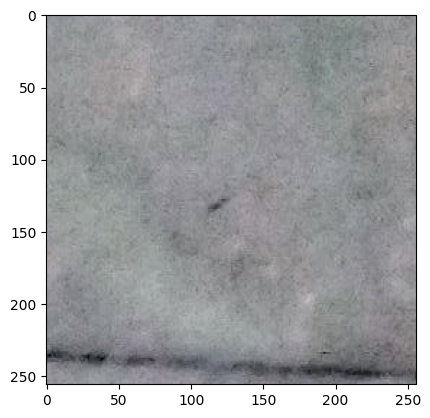

In [5]:
plt.imshow(new_df[1200])
plt.show()

In [6]:
print(new_df.shape)

(2249, 256, 256, 3)


In [7]:
# dirname


# # Deep learning AutoEncoder

In [8]:
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Conv2DTranspose,Input,TimeDistributed,UpSampling2D
from keras.models import Model
from keras.initializers import HeNormal
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [9]:
early_stopping=EarlyStopping(
monitor='val_loss',
patience=5,
verbose=1)

In [ ]:
inputs=Input(shape=(256,256,3))
E=Conv2D(320,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Dropout(0.2)(E)
E=Conv2D(220,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
# E=BatchNormalization()(E)
E=Dropout(0.2)(E)

E=Conv2D(100,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Dropout(0.2)(E)


D=Conv2DTranspose(100,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
D=UpSampling2D(size=(2,2))(D)
D=Dropout(0.2)(D)

D=Conv2DTranspose(220,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(D)
D=UpSampling2D(size=(2,2))(D)
D=Dropout(0.2)(D)

D=Conv2DTranspose(320,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(D)
D=UpSampling2D(size=(2,2))(D)
D=Dropout(0.2)(D)

# D=Conv2DTranspose(620,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(D)

# D=MaxPooling2D(pool_size=(2,2),strides=(2,2))(D)

outputs=Conv2D(3,(1,1),padding="same",activation="sigmoid")(D)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["mae"])
model.fit(new_df,new_df,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5


I0000 00:00:1726726298.274682     452 service.cc:145] XLA service 0x7c22c4090370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726726298.274738     452 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726726298.274744     452 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-09-19 06:12:13.639935: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng28{k2=3,k3=0} for conv (f32[32,220,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,320,128,128]{3,2,1,0}, f32[220,320,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-19 06:12:13.649774: E external/loca

57/57 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - loss: -42109344153600.0000 - mae: 169.6949 - val_loss: -3413600278413312.0000 - val_mae: 152.1773
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 890ms/step - loss: -154481177544097792.0000 - mae: 168.9734 - val_loss: -3432230824341143552.0000 - val_mae: 152.1773
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 889ms/step - loss: -22312501612644401152.0000 - mae: 168.7369 - val_loss: -200729481594693222400.0000 - val_mae: 152.1773
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 890ms/step - loss: -653878263216619913216.0000 - mae: 169.6787 - val_loss: -3239610067278461140992.0000 - val_mae: 152.1773
Epoch 5/5
53/57 ━━━━━━━━━━━━━━━━━━━━ 3s 783ms/step - loss: nan - mae: nan